In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

from gradvi.tests import toy_priors
from gradvi.tests import toy_data
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma
from gradvi.inference import Trendfiltering
from mrashpen.utils import R_trendfilter

def saveplot(fig, fileprefix, ext = 'png', plotdir = 'plots'):
    filename = f"{plotdir}/{fileprefix}.{ext}"
    fig.savefig(filename, bbox_inches = 'tight')
    return

plotprefix = 'doppler'

In [2]:
import special_data
n = 1024
data = special_data.doppler(n)

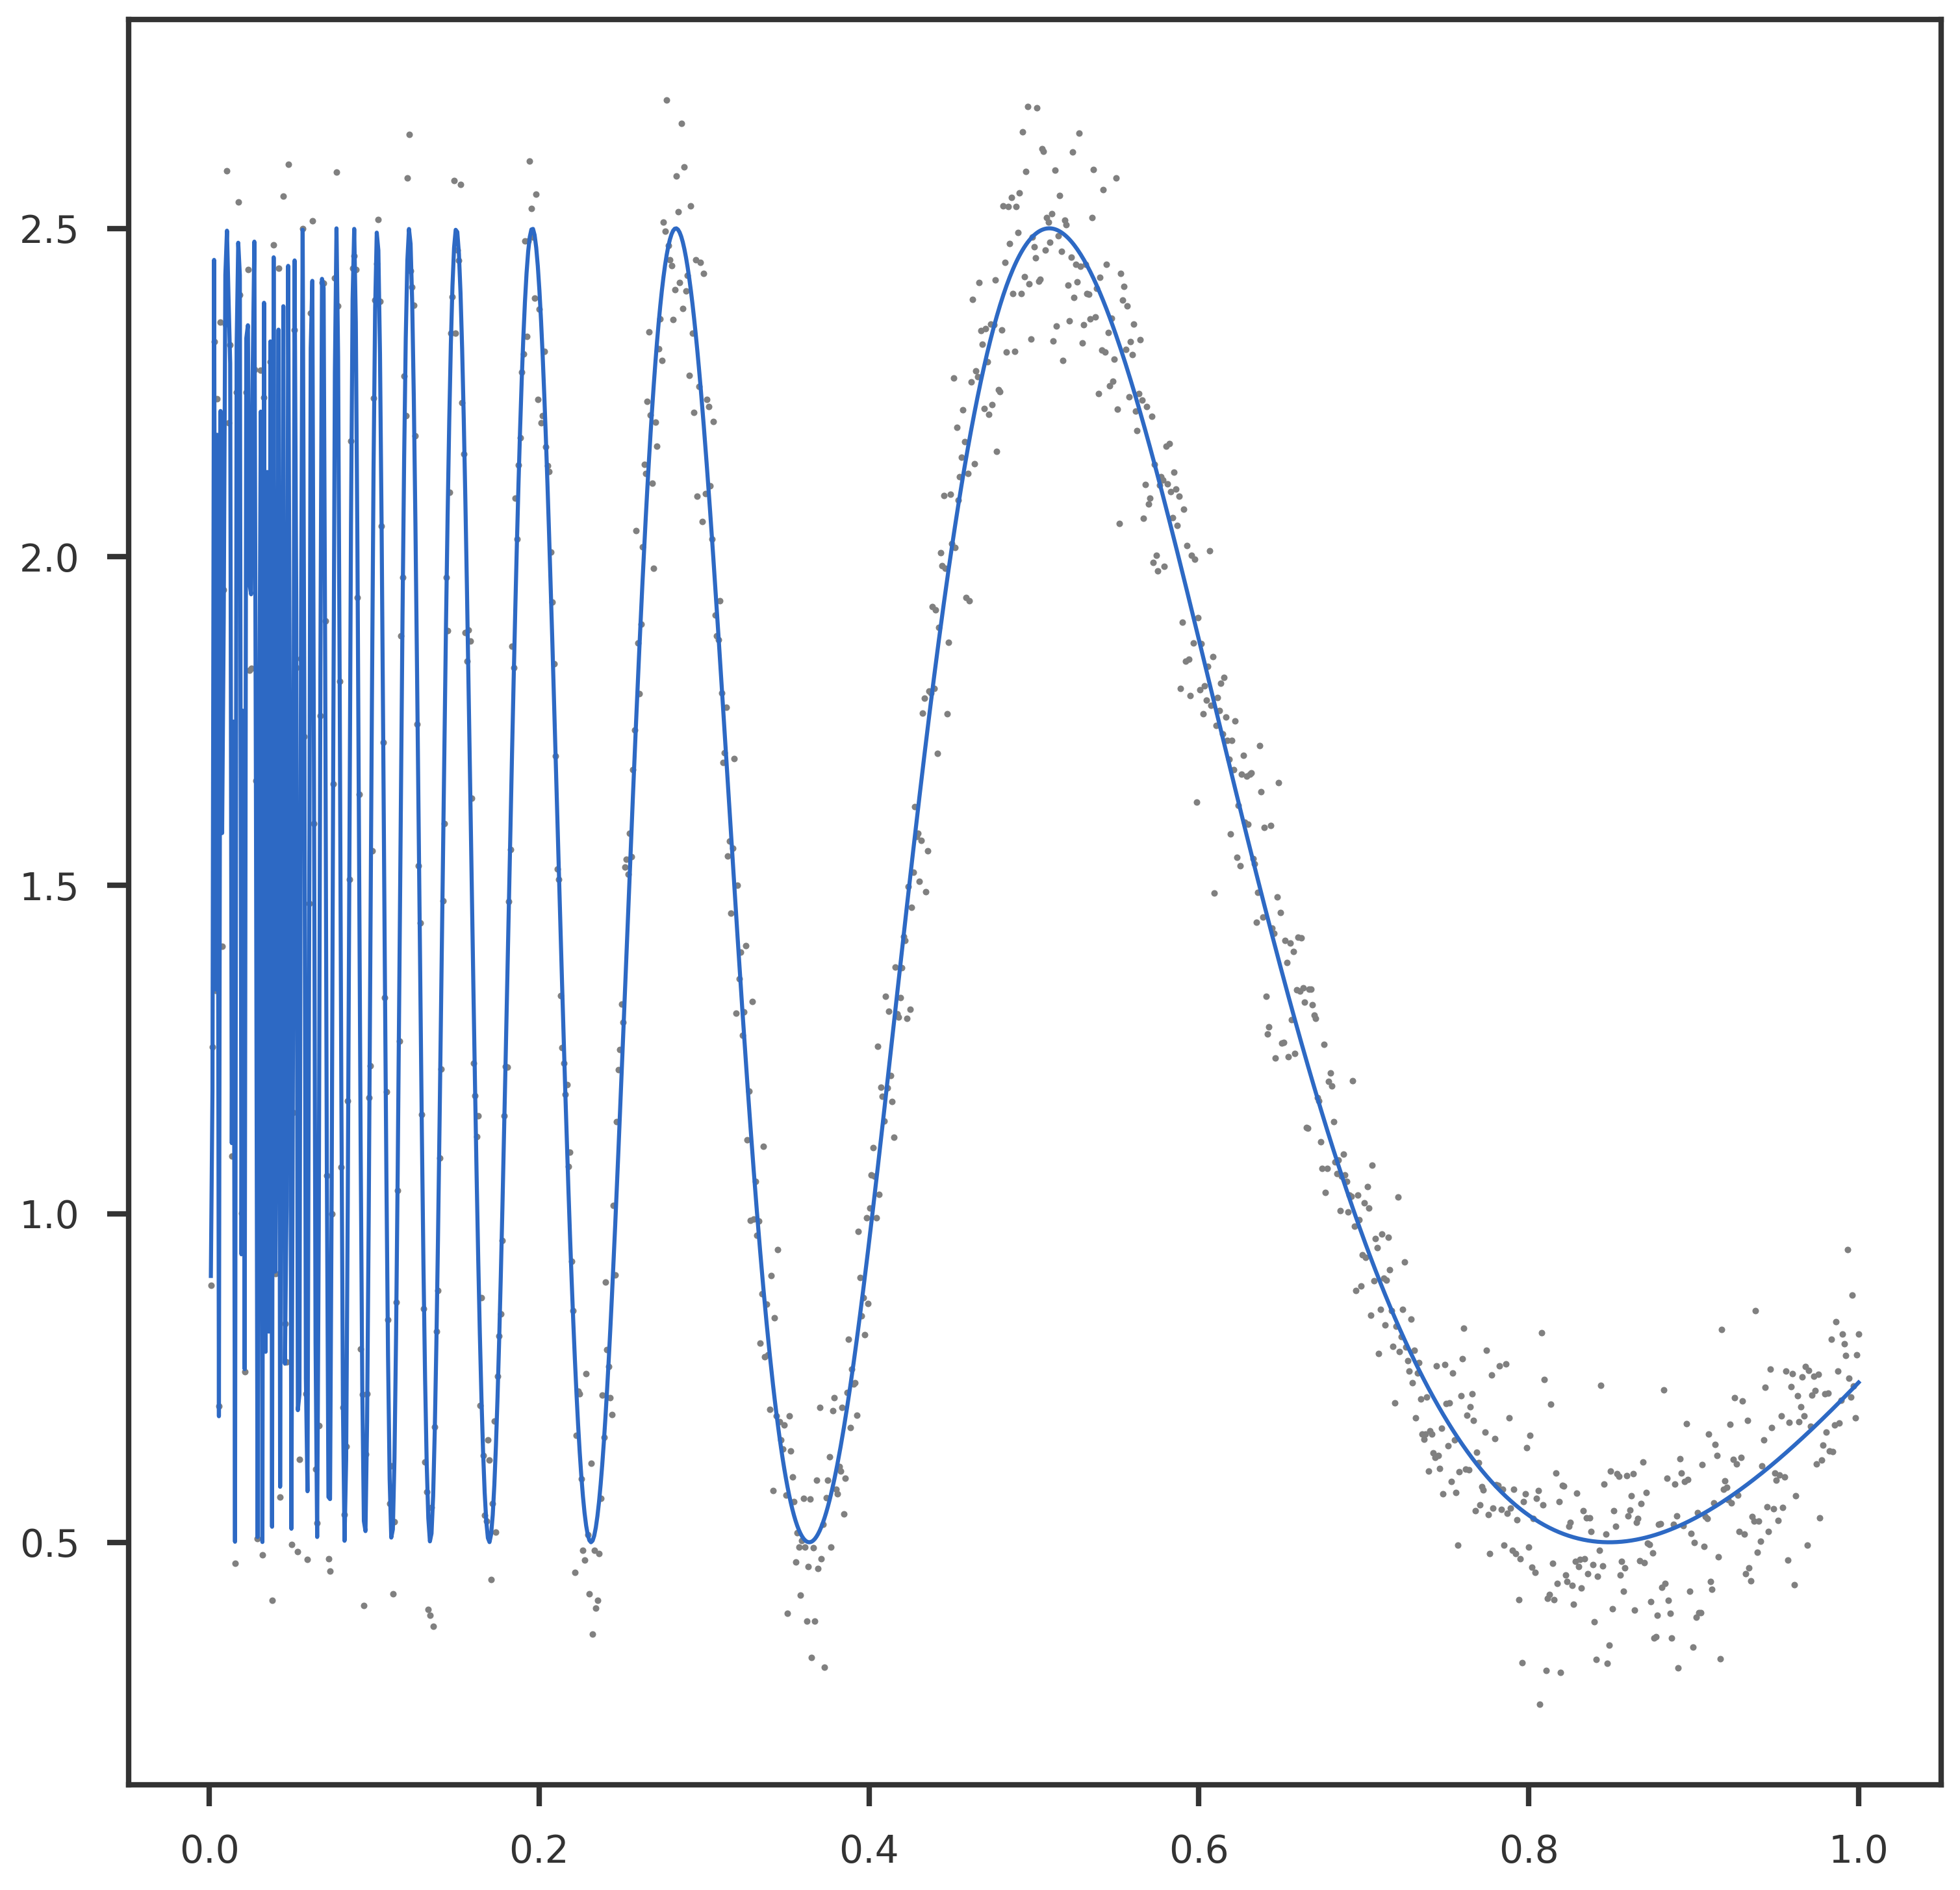

In [3]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
ax.scatter(data.x, data.y, s = 2, color = 'gray')
ax.plot(data.x, data.ytrue)
plt.show()

In [5]:
tf_y, tf_fit = R_trendfilter.fit(data.y, order = 3)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



In [75]:
prior_init = toy_priors.get_ash(k = 20, sparsity = 0.9, skfactor = 1.)
gv = Trendfiltering(maxiter = 10000, standardize_basis = False, standardize = False)
gv.fit(data.y, 3, prior_init, y_init = tf_y, s2_init = 0.001)

In [76]:
prior_init.w

array([0.9       , 0.00526316, 0.00526316, 0.00526316, 0.00526316,
       0.00526316, 0.00526316, 0.00526316, 0.00526316, 0.00526316,
       0.00526316, 0.00526316, 0.00526316, 0.00526316, 0.00526316,
       0.00526316, 0.00526316, 0.00526316, 0.00526316, 0.00526316])

In [77]:
gv.prior.w

array([0.89999983, 0.00526317, 0.00526317, 0.00526317, 0.00526317,
       0.00526317, 0.00526317, 0.00526317, 0.00526317, 0.00526317,
       0.00526317, 0.00526317, 0.00526317, 0.00526317, 0.00526317,
       0.00526317, 0.00526317, 0.00526317, 0.00526317, 0.00526317])

In [78]:
print (f"Run {gv.niter} iterations.")

Run 544 iterations.


In [79]:
gv.elbo_path

array([1193377.5511642 ,  138175.49883145,  126312.54861798,
        116168.92628233,   84392.29933957,   74892.26098142,
         74758.66409958,   74750.9701776 ,   74743.03270876,
         74721.96584995,   74668.34598882,   74516.45060965,
         74176.57873182,   72101.33807194,   70718.05152739,
         70592.40290369,   69949.43838278,   69354.01416781,
         69021.3272374 ,   68966.05435897,   68937.08838137,
         68923.0245487 ,   68914.85534712,   68914.51530281,
         68894.4112964 ,   68892.56693149,   68870.55292345,
         68860.80281215,   68850.91641796,   68832.4132367 ,
         68820.57957051,   68810.31763712,   68805.74005939,
         68786.23568778,   68763.09052244,   68750.1433014 ,
         68711.82671002,   68696.88648128,   68672.4511627 ,
         68668.00642618,   68666.30525711,   68665.29325286,
         68664.55104923,   68662.61264681,   68652.79510725,
         68652.7337569 ,   68651.58715683,   68647.87246946,
         68647.70047642,

In [80]:
gv.residual_var

0.001000000611238611

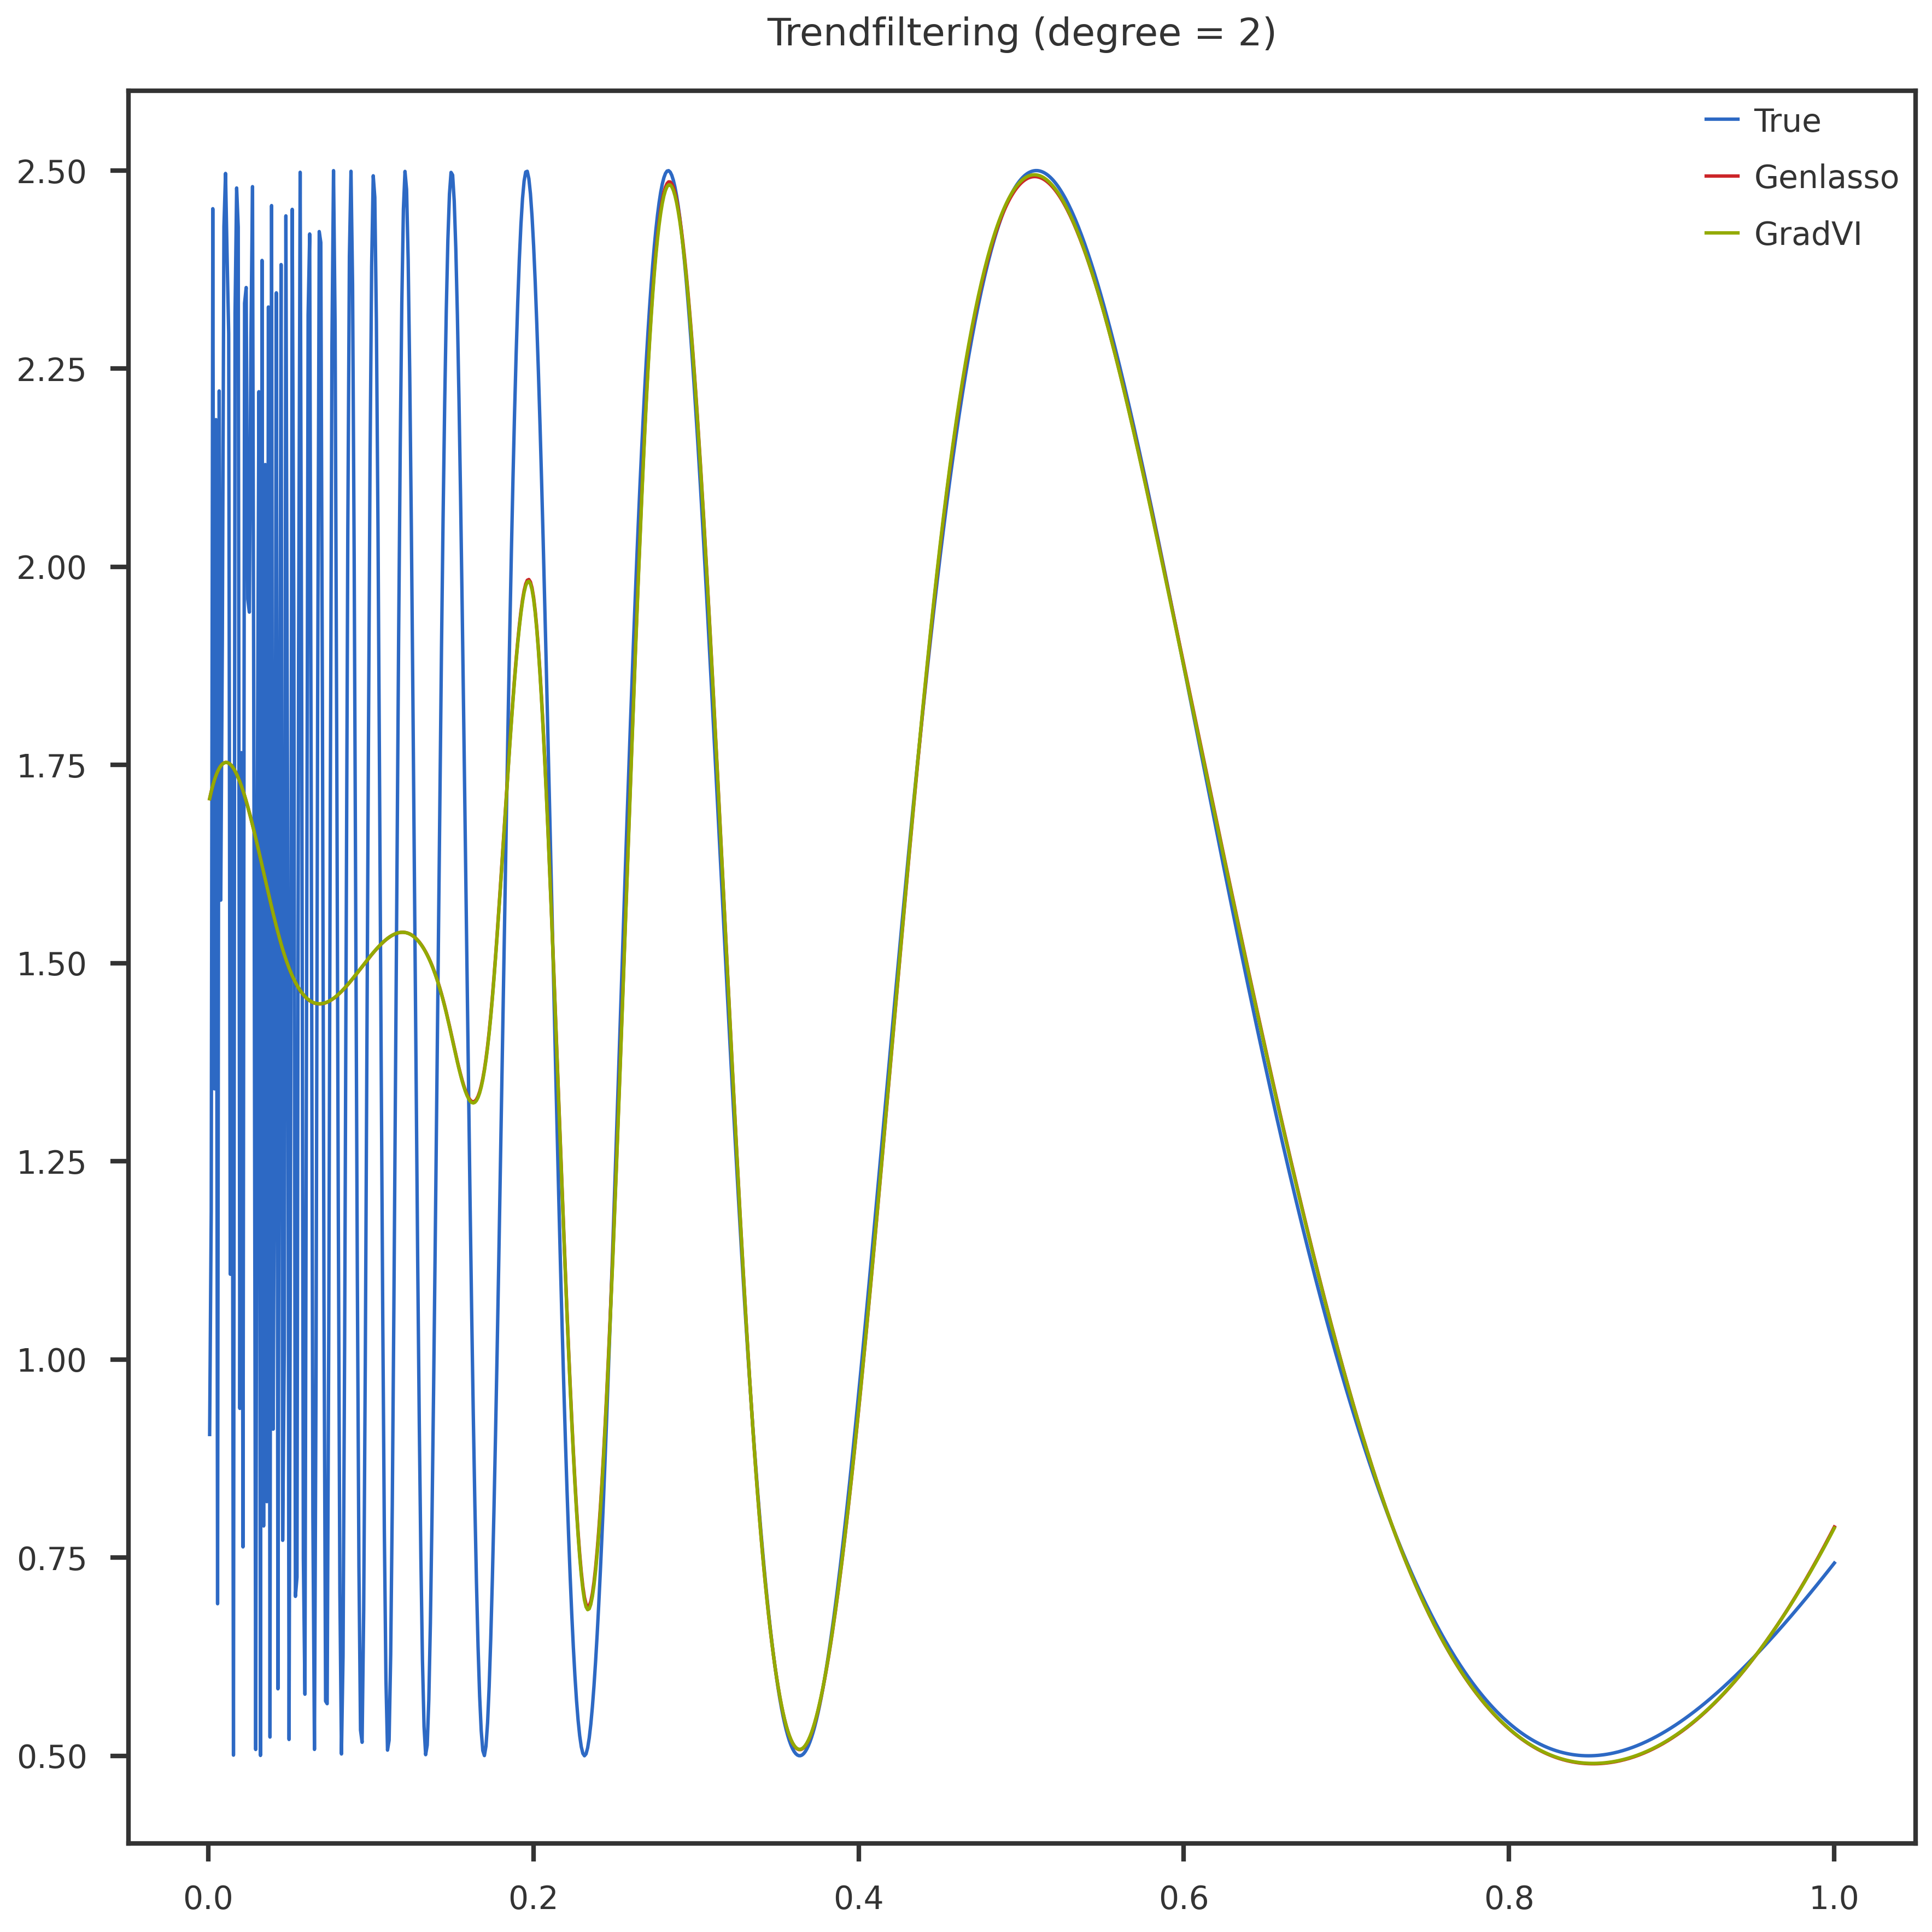

In [81]:
fig = plt.figure(figsize = (12, 12))
ax  = fig.add_subplot(1,1,1)
ax.plot(data.x, data.ytrue, label = 'True')
ax.plot(data.x, tf_y, label = 'Genlasso')
ax.plot(data.x, gv.ypred, label = 'GradVI')
ax.set_title(f"Trendfiltering (degree = 2)", pad = 20)
ax.legend()


fig.tight_layout()
#fig.subplots_adjust(wspace=0.25)
# utils.saveplot(fig, 'trendfiltering_simple_examples')
plt.show()